# Applications of Central Limit Theorem
Michelle Yaochai | Zheng Chong, Emily | Marvin Dragon Choo | Brian Ku
<br>01 Apr 2022

## Introduction
We explore the Central Limit Theorem (CLT) and their applications in this notebook.

* In Part A, we define and illustrate CLT using examples such as coin flips and rolling a fair dice. We also show how to use CLT to calculate population parameters from samples, as well as situations where CLT fails.
* In Part B, we demonstrate the utility of CLT by simulating various physical systems, and validating key parameters against those predicted by CLT. We will be exploring the random walk in relation to CLT and other interesting applications.

### Table of Contents

1. [Part A: Illustration](#Part-A:-Illustration)

    1.1. [Motivation](#Motivation)
    
    1.2. [The Normal Distribution](#The-Normal-Distribution)

    1.3. [Definition of the Central Limit Theorem](#Definition-of-the-Central-Limit-Theorem)

    1.4. [Sampling Distribution](#Sampling-Distribution)

    1.5. [Additional Conditions](#Additional-Conditions)

    1.6. [Direct Application](#Direct-Application)
    
    1.7. [Limitations](#Limitations)


2. [Part B: Demonstration](#Part-B:-Demonstration)

    2.1. [Random Walk](#Random-Walk)

    2.2. [Brownian Motion](#Brownian-Motion)

    2.3. [Cauchy Flight](#Cauchy-Flight)

    2.4. [Case Study: The Gambler's Ruin Problem](#Case-Study:-The-Gambler's-Ruin-Problem)


3. [Closing Remarks](#Closing-Remarks)


4. [Appendix: Hypothesis Testing](#Appendix:-Hypothesis-Testing)


5. [References/Further Reading](#References-/-Further-Reading)

### Importing Modules
The following modules will be used in this notebook, each of which will be introduced as they are used.

In [1]:
# Importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image

## Part A: Illustration

### Motivation

The Central Limit Theorem is an important theorem in the field of statistics, and it has important and wide-ranging application to other fields. We often find ourselves dealing with large numbers of variables.

Imagine you're a Student Union leader who wants to find out the distribution of the number of hours of sleep per day within the population of NUS students. One way of doing so would be to collect the data from every single NUS student - this is known as conducting a *census*. Such a procedure would be very cumbersome. Instead, you would opt to collect a *sample*, for example, a random sample of 30 NUS students.

For the first sample of 30 students, the distribution of number of hours of sleep per day might look something like this.

Mean number of hours of sleep from this sample = 3.90


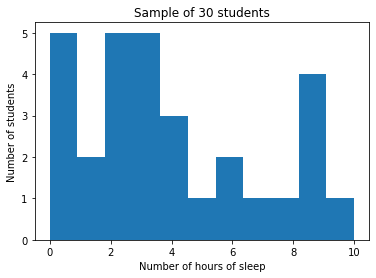

In [2]:
# A sample of 30 students sleep time
y = [np.random.randint(0,11) for _ in range(30)]

print(f'Mean number of hours of sleep from this sample = {np.mean(y):.2f}')

plt.hist(y,bins=11)
plt.xlabel('Number of hours of sleep')
plt.ylabel('Number of students')
plt.title('Sample of 30 students')
plt.show()

Suppose you have many volunteers at your disposal, each independently collecting a sample from some fixed number ($n$) of students. We can take the mean number of hours from each sample, and plot them in a histogram. We see that as $n$ increases, the **distribution of sample means will begin to look more and more like a [normal distribution](#The-Normal-Distribution)**. This is the idea known as the *Central Limit Theorem* (CLT).

The CLT is extremely useful as it allows us to use the properties of the normal distribution to predict *population* parameters based on *sample* data. In the example above, we would be able to estimate the mean number of hours of sleep for the population of NUS students by approximating the sampling distribution to a normal distribution.

### The Normal Distribution
But first, what is a normal distribution?

The normal (or Gaussian) distribution is a type of continuous probability distribution function, generally defined as follows:

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right) $$

- $\mu$ is the *mean* (i.e., expected value) of the distribution. The normal distribution is symmetrical around $\mu$, and gets closer to 0 the further it is from $\mu$.
    * A higher mean corresponds to a curve shifted to the right along the x-axis.
- $\sigma$ is the *standard deviation* of the distribution. It is a measure of the spread of the distribution - the higher $\sigma$ is, the more spread out the distribution is around the mean.
    * $\sigma^2$ is referred to as the *variance* of the distribution.
    * A higher variance corresponds to a wider curve.

Let us plot some normal distribution curves with ```scipy.stats.norm```! (Feel free to change the code and play around with the mean and variance values.)

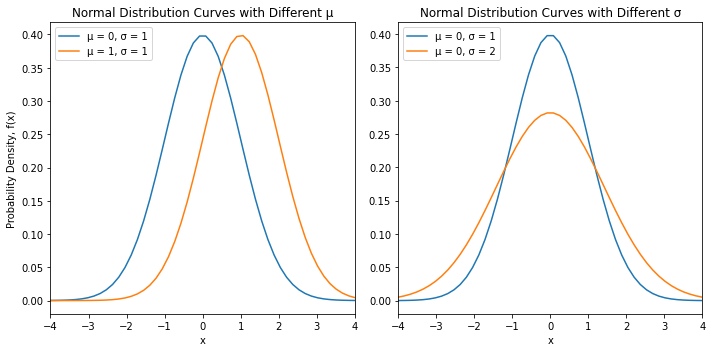

In [3]:
def get_normal_points(mean=0,var=1,x_min=-1,x_max=1):
    '''
    Returns 2 arrays containing the x and y values of points in a normal curve.
    
    Parameters
    ----------
    mean, var: Centre and spread of the curve. (default: 0, 1)
    x_min, x_max: Left and right limits. (default: -1,1)
    
    Returns
    -------
    x, y: Two 1D arrays containing x and norm(x) values respectively.
    '''
    x = np.linspace(x_min,x_max,endpoint=True)
    # norm takes in mean, std. std = var**0.5
    y = norm(mean,var**0.5).pdf(x)
    return x,y

# Data
x_1, y_1 = get_normal_points(0,1,-4,4)
x_2, y_2 = get_normal_points(0,2,-4,4)
x_3, y_3 = get_normal_points(1,1,-4,4)

# Plotting
fig, ax = plt.subplots(ncols = 2, figsize = (10,5))

ax[0].plot(x_1,y_1, label="μ = 0, σ = 1")
ax[0].plot(x_3,y_3, label="μ = 1, σ = 1")
ax[0].set_title('Normal Distribution Curves with Different μ')

ax[1].plot(x_1,y_1, label="μ = 0, σ = 1")
ax[1].plot(x_2,y_2, label="μ = 0, σ = 2")
ax[1].set_title('Normal Distribution Curves with Different σ')

# Customizing
for i in range(2):
    ax[i].set_xlim(-4,4)
    ax[i].set_xlabel('x')
    ax[i].legend(loc = 'upper left')
    ax[0].set_ylabel('Probability Density, f(x)')
    
plt.tight_layout()
plt.show()

### Definition of the Central Limit Theorem
Now, we shall give a common definition of the CLT:

> The distribution of sample means approximates a normal distribution as the sample size gets larger, even if the population is not normally distributed.

This definition is certainly not the most mathematically rigorous, but is sufficient for the scope of the project. There are also [additional conditions](#Additional-Conditions) necessary for CLT, and they will be introduced as appropriate.

Let us illustrate the assertion that CLT makes, through the example of coin flips.

Consider the act of flipping a fair coin. There is an equal probability (0.5) of it landing on heads or tails. Since there are only two outcomes, this system is equivalently represented with a binomial distribution with probability of success (getting heads) $p=0.5$.

To begin, let's see what happens when we flip the coin 100 times. Since this is a binomial distribution, we can make use of ```numpy.random.binomial``` to simulate these coin flips.

Out of 100 coin flips, there were 51 heads and 49 tails.


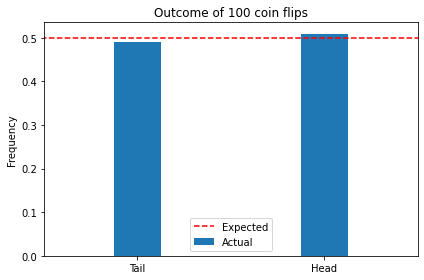

In [4]:
n = 100
p = 0.5

# Labels
flip_outcomes = ['Tail', 'Head']

# Generating data
# Count the number of heads after flipping a coin n times, each with probability p of landing on heads.
num_heads = np.random.binomial(n=n,p=p)
num_tails = n - num_heads

# Show outcome
print(f'Out of {n} coin flips, there were {num_heads} heads and {num_tails} tails.')

# Plot
# Actual
plt.bar(flip_outcomes, [num_tails/n, num_heads/n], width=0.25, label='Actual')
# Expected
plt.hlines(y=0.5, xmin=-0.6, xmax=1.6, linestyles='--',
           colors='red', label='Expected')

# Customize and Show
plt.xlim([-0.5, 1.5])
plt.ylabel('Frequency')
plt.title(f'Outcome of {n} coin flips')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()


If asked to predict the number of heads, it is probably instinctive to expect 50 of each, after all, we expect an equal number of heads and tails. However, most of the time, we get a number that is *close to*, but not exactly 50. Try running the above cell multiple times! Here, we take this opportunity to explain more key terms.

* Each time you execute the cell, you generate one **sample** of 100 coin flips.
* The **sample size $n$** is the number of independent coin flips that were performed. Here, it is 100.
* The direct output of each sample, which is a number between 0 and 100, is the total number of heads in that sample.

### Sampling Distribution
You would probably have noticed that each time you run the above cell, you likely get a different result, even though it simulates the same coin flip over and over again.

Yet, it is not equally likely to obtain each outcome. In sample size of 100, it is more likely to observe a sample with 40 heads than one with 10 heads, because the latter case is more extreme. We can visualize such variability between different samples collected from the same 'population' by simulating many independent samples, and observing the distribution in the number of heads using a histogram.
> This distribution is what *'distribution of sample means'* in the definition of CLT refers to! (Although in this case, it is more accurate to call this the distribution of *sample sums*.)

Let us run the simulation again using ```numpy.random.binomial```. In particular, we shall vary the sample sizes and observe the impact on the distribution of sample sums.

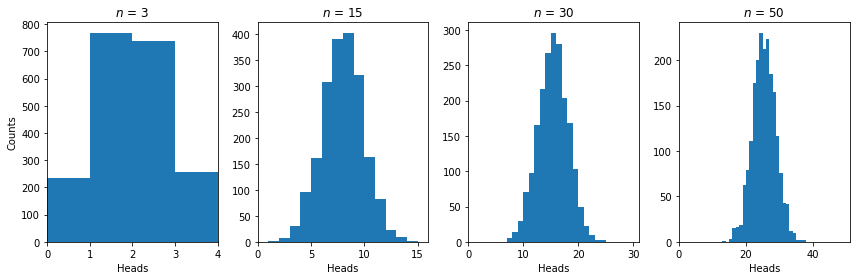

In [5]:
# Individual sample sizes to test
n_vals = [3, 15, 30, 50]
# Probability of getting heads. p = 0.5 is a fair coin -- equal chance of heads and tails
p = 0.5
# Generate 2000 independent samples
s = 2000

# Data
# Access via dist = arr[sample_size_index], dist = [mean1, mean2, ... mean2000]
# 'Heads' (success) is assigned '1', while 'tails' is assigned '0'
flip_distribution = [np.random.binomial(i, p, s) for i in n_vals]

# We will reuse this later, so putting it in a function first

def plot_coin_flip_CLT(flip_distribution, n_vals, normalize = False):
    '''
    Returns a plot of the distribution of number of heads
    
    Parameters
    ----------
    flip_distribution: The data to be plotted in a 2D array. Should have dimensions (no. of tested sample sizes, samples)
    n_vals: List of tested sample sizes
    normalize: If true, normalizes counts to frequency, otherwise, uses counts. (default: False)
    
    Returns
    -------
    fig, ax: Plot of the distribution, to be used for further customizations.
    '''
    fig, ax = plt.subplots(ncols=len(n_vals), figsize=(3*len(n_vals), 4))

    # Making good histograms
    for i, dist in enumerate(flip_distribution):
        min_value = min(dist)
        max_value = max(dist)

        # Max ensures that step sizes in the following histogram are at least 1, but otherwise such that there will be around 30 bins
        step_size = max((max_value-min_value)//30, 1)
        # n+2 ensures the outcome with all heads is also captured.
        bin_range = range(0, n_vals[i]+2, step_size)

        # Plot histogram and customize
        ax[i].hist(dist, bins=bin_range, density=normalize)
        ax[i].set_xlabel('Heads')
        ax[i].set_title(f'$n$ = {n_vals[i]}')
        ax[i].set_xlim(0,n_vals[i]+1)
    # Common y axis label
    if normalize:
        ax[0].set_ylabel('Relative frequency')
    else:
        ax[0].set_ylabel('Counts')

    return fig, ax


plot_coin_flip_CLT(flip_distribution, n_vals)
plt.tight_layout()
plt.show()

Restating CLT from above, we can quite clearly observe that:
> The *distribution of sample means* approximates a normal distribution *as the sample size gets larger*, even if the population is not normally distributed.

In this example, the 'distribution of population' is the distribution of all possible outcomes of the coin flip (i.e., 0.5 chance of heads and tails respectively). Note that the *distribution of population* is certainly not normally distributed, but the *distribution of sample means* is.

### Additional Conditions
In real life, scientists would impose some further conditions before using CLT, to account for more extreme probability distribution functions. Here is a summary of the conditions necessary for CLT to hold true:

* The data must be sampled randomly from the population by using a probability sampling method.
* Each of the sample values must be independent of each other. That is, the occurrence of one event does not affect the occurrence of any other event.
* Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold. (Again, a sample size is the number of data points in one sample)
* When the sample is drawn without replacement, the sample size must be no larger than 10% of the total population.


If all these conditions are fulfilled, then, by the central limit theorem, the *sampling distribution* obtained will represent a normal distribution, regardless whether the variable actually follows a normal distribution in the *population*. (e.g., The distribution of people's heights in Asia are skewed towards the shorter end, but the distribution of mean heights collected from samples of Asian people will be normally distributed.)

### Direct Application
We can now easily control the conditions of sampling to generate a normal distribution. To turn CLT into a useful tool, we need to establish a link between the sample statistics and population statistics.

#### Population statistics
The mean ($\mu$) and variance ($\sigma^2$) of the number of heads in a single flip of a fair coin are respectively given by:

$$\mu = 0.5\cdot0 + 0.5\cdot1 = 0.5$$

$$\sigma^2 = 0.5\cdot(1-0.5)^2 + 0.5\cdot(0-0.5)^2 = 0.25$$

#### Sample statistics
Scaling this up to $n$ independent coin flips, we *expect* the subsequent distribution to have both mean and variance scaled up by $n$. (The mathematical derivation for this is beyond the scope of this project.)

Let $X$ represent the number of heads in $n$ independent coin flips (i.e., what we have been plotting thus far).

- The expected number of heads across samples is given by:

$$E(X) = n\mu,$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;where $\mu$ is the expected number of heads for a flip.

- The expected variance among sample means (i.e., expected variance in the number of heads across samples) is given by:

$$E(Var(X))=n\sigma^2,$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;where $\sigma^2$ is the expected variance in the number of heads per flip.

#### Utility
This also means that if we did not know the population mean and variance (for example, if we **did not know** that the coin is fair), our best guess for the mean and variance would then be

$$\mu=\bar{X}/n$$

$$\sigma^2 = Var(X)/n$$

Therefore, in the following section, we will:
 
1. Compare the **expected** distribution (normal distribution) against the actual data, and show a good agreement for high $n$ values.
   > The expected distribution is normal, with $(\mu,\sigma^2)=(0.5n,0.25n)$


2. Estimate the true mean and variance of the coin from the observed distributions.

Note that we have also normalized the graph so that the y-axis now represents the relative frequency, which corresponds to the relative probability of getting a sample mean within the specified bin.

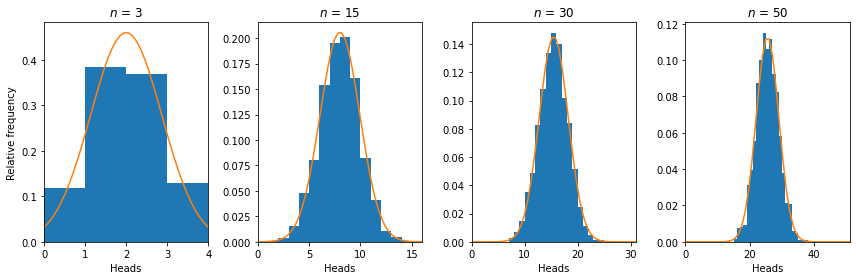

Estimates of population mean and variance based on samples
n = 3 : μ = mean/n = 0.50, σ^2 = var/n = 0.25
n = 15: μ = mean/n = 0.50, σ^2 = var/n = 0.25
n = 30: μ = mean/n = 0.50, σ^2 = var/n = 0.25
n = 50: μ = mean/n = 0.50, σ^2 = var/n = 0.24
Actual population statistics: μ = 0.5, σ^2 = 0.25


In [6]:
# Plotting the same plots again, but this time we superimpose the normal curve to see the fit
fig, ax = plot_coin_flip_CLT(flip_distribution, n_vals, True)

for i, dist in enumerate(flip_distribution):

    # -1/+1 serves to ensure that the normal curves plotted will go to y = 0
    x,y = get_normal_points(mean = 0.5*n_vals[i],var = 0.25*n_vals[i],x_min = -1,x_max = n_vals[i]+1)
    
    # +0.5 serves to offset
    # Observe that for i heads it will be plotted between i and i+1 when there are only 3 bins
    # Thus the normal curve should be plotted on i+0.5
    # This is only an issue for n=3 case, when there are sufficient bins, the offset is negligible
    ax[i].plot(x+0.5,y)

plt.tight_layout()
plt.show()    

# Print the estimates
print('Estimates of population mean and variance based on samples')
for i, dist in enumerate(flip_distribution):
    print(f'n = {n_vals[i]:<2}: μ = mean/n = {np.mean(dist)/n_vals[i]:.2f}, σ^2 = var/n = {np.var(dist)/n_vals[i]:.2f}')

print(f'Actual population statistics: μ = 0.5, σ^2 = 0.25')


We see a close agreement between the best estimate and theoretical mean and variance.

In the following section, we apply the same idea to a N-sided fair dice, though with a slight modification. For each sample, we will take the **average** of the rolls within that sample (the sample mean). This is in contrast to the coin flip example, where we took the **total** number of heads per sample (the sample sum).

By taking the average, we restrict the possible sample values to the range $[1,n]$, making it independent of sample size.

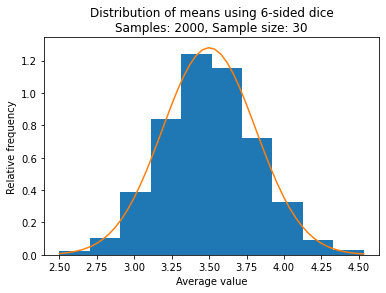

In [7]:
def plot_N_sided_dice(sides = 6, size = 30, samples = 2000):
    '''
    Plots the distribution of sample means of a N-sided fair dice.
    
    Parameters
    ----------
    sides: Number of sides the dice has (default: 6)
    size: Sample size (i.e,, number of dice rolls in a sample) (default: 30)
    samples: Number of samples to take (default: 2000)
    '''
    # Theoretical mean and variance
    mean_theory = np.mean(range(1,sides+1))
    var_theory = np.var(range(1,sides+1))/size

    # Data
    # List of sample means (sample size as specified) of n-sided dice rolls
    dice_mean_dist =  [np.mean(np.random.randint(1, sides+1, size)) for _ in range(samples)]
    
    # Getting points for normal graph
    x,y = get_normal_points(mean_theory,var_theory,min(dice_mean_dist),max(dice_mean_dist))
    
    # Plot
    plt.hist(dice_mean_dist,density=True)
    # Not doing the offset since low sample sizes should not be used, especially after CLT was just demonstrated.
    plt.plot(x,y)
    
    # Customize and show
    plt.title(f'Distribution of means using {sides}-sided dice\nSamples: {samples}, Sample size: {size}')
    plt.xlabel('Average value')
    plt.ylabel('Relative frequency')
    plt.show()

plot_N_sided_dice()

The theoretical normal distribution is ovarlaid as a qualitative gauge for how well it fits. Feel free run the above cell with different number of sides/various sample sizes and check for yourself that the subsequent distribution closely agrees with a normal distribution when the sample size is at least 30.

### Limitations
Nonetheless, CLT only works when the original distribution has a **well-defined (i.e. finite) mean and variance**. For all finite discrete probability distribution functions, such as dice roll or the coin flip, it is always possible to compute a finite mean and variance.

> CLT works for all finite discrete probability distribution functions.

However, this may not be true when moving into a *continuous* distribution function. Here, we draw samples from a *pareto distribution*, using a process similar to the binomial distribution, but with ```numpy.random.pareto``` instead.

Much like how the binomial distribution is characterised by the probability $p$, the pareto distribution is characterised by the parameter $a$ (where $a > 0$). It has a mean of 1, and displays a signature 'long-tailed' distribution, as we see below.

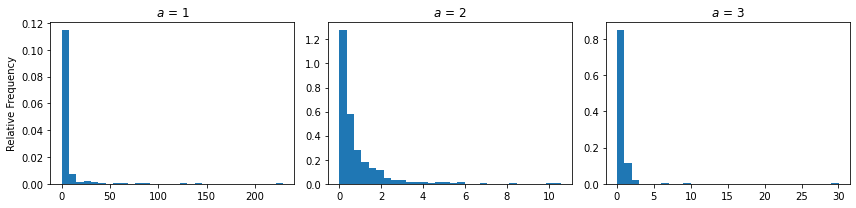

In [8]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 3))

for i in range(3):
    ax[i].hist(np.random.pareto(i+1, 300), density=True, bins=30)
    ax[i].set_title(f'$a$ = {i+1}')

ax[0].set_ylabel('Relative Frequency')
plt.tight_layout()
plt.show()


Notice that as $a$ increases, the maximum sample value decreases (i.e., extremely large values are less likely to be produced), while the spread of values away from the mean of 1 increases.

Here are some known characteristics for various $a$ values:

* When $a \le 1$, the distribution has an infinite mean.
* When $a \le 2$, the distribution has an infinite variance.

Hence, when $a \le 2$, we expect CLT to fail, and when $a > 2$, we expect CLT to succeed. In the following section, we test this idea using $a=1,1.5,4$, and observe how it looks like when CLT fails. (Note: Since there is no defined mean and variance for some values of $a$, the normal distribution overlay uses the *observed* sample mean and variance instead of the theoretical statistics derived from the population.)

a = 1


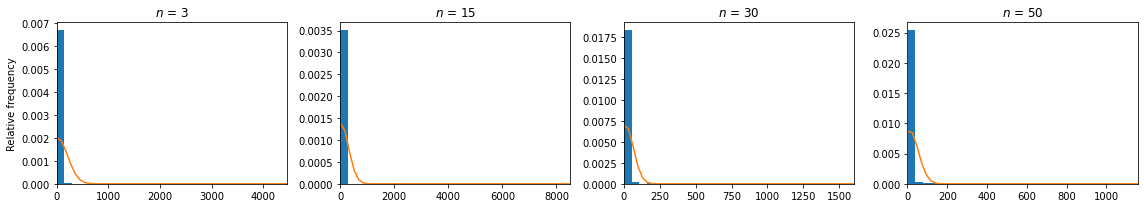

a = 1.5


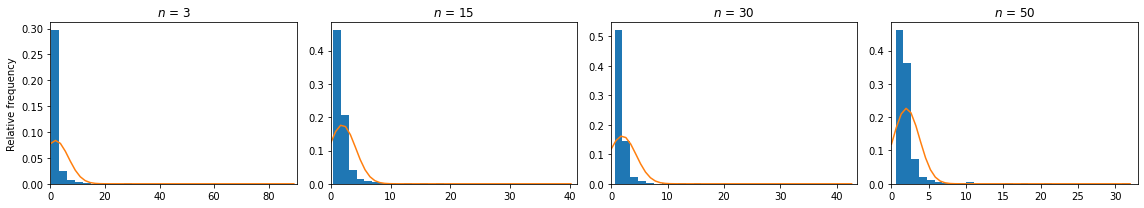

a = 5


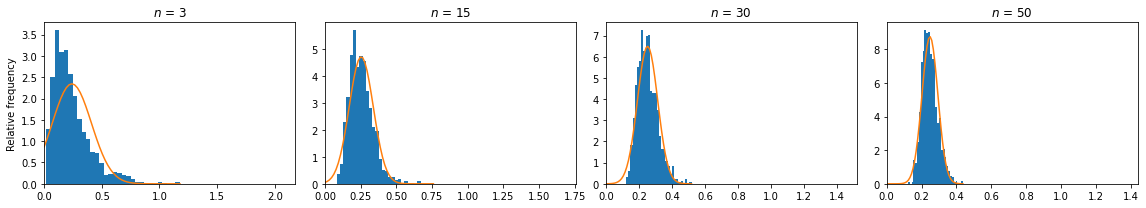

In [9]:
# Individual sample sizes to test
n_vals = [3, 15, 30, 50]
# Indiviudal a values to test
a = [1, 1.5, 5]

# Generate 2000 independent samples
s = 1000


def pareto_mean(a=1, size=30):
    '''
    Returns mean of a sample drawn from the pareto distribution.
    
    Parameters
    ----------
    a: Charaterises the distribution (default: 1)
    size: Sample size (default: 30)    
    '''
    return np.mean(np.random.pareto(a, size))


def plot_pareto(result, n_vals):
    '''
    Returns a plot of sample means obtained from pareto distribution.
    
    Parameters
    ----------
    result: The data to be plotted in a 2D array. Should have dimensions (no. of tested sample sizes, samples)
    n_vals: List of tested sample sizes
    
    Returns
    -------
    fig, ax: Plot of the distribution, to be used for further customizations.
    '''
    fig, ax = plt.subplots(ncols=len(n_vals), figsize=(4*len(n_vals), 3))

    for i, dist in enumerate(result):
        # Plot histogram and customize
        ax[i].hist(dist, bins=30, density=True)
        ax[i].set_title(f'$n$ = {n_vals[i]}')
    ax[0].set_ylabel('Relative frequency')
    return fig, ax


# For each a, generate 2000 samples for each sample size
for a_val in a:
    print(f'a = {a_val}')
    pareto_data = [[pareto_mean(a_val, size) for _ in range(s)] for size in n_vals]
    fig,ax = plot_pareto(pareto_data,n_vals)

    # Overlay of the normal curve generated using the sample statistics
    for i, dist in enumerate(pareto_data):
        x, y = get_normal_points(np.mean(dist), np.var(dist), 0, np.max(dist))
        ax[i].plot(x, y)
        ax[i].set_xlim(0,np.max(dist)+1)
    
    plt.tight_layout()
    plt.show()


Indeed, we can observe that when $a \le 2$, the distribution of means does not converge to a normal distribution, regardless of the sample size.

For $a=5$, we observe a trend towards the normal distribution with increasing sample size, following the above discussions. Feel free to change the values of $a$ and $n$, and observe how it changes the subsequent distribution!

## Part B: Demonstration
### Random Walk

Remember the [fair coin flips](#Definition-of-the-Central-Limit-Theorem) we demonstrated earlier? We can use the same concept to simulate a **one-dimensional random walk** along a linear axis, starting from the origin.
* At each step, the object can either move a distance of +1 (forward) or -1 (backwards) with equal probability $p=0.5$. 
* When the object moves $n$ number of steps, assuming that the steps are independent and that $n$ is large enough, the probability distribution of the object's position approaches a normal distribution, just as we see in the coin flip example!

In this section, we demonstrate that for a random walk in $N$-dimensions ($N$ D), the distribution of final displacements follows the normal distribution for **each dimension** after a sufficiently large number of steps, in accordance to the CLT. (Note that simulating a $N$-dimensional random walk with a fixed step length is equivalent to simulating $N$ independent 1D random walks. This is a consequence of the Pythagorean theorem.)

We will be using ```np.random.choice``` to choose between the step displacements of $1$ or $-1$, with respective probabilites of $p$ and $(1-p)$. We will then produce some animations to aid in the visualization of 2D and 3D random walks.

#### Convergence to Normal Distribution

As mentioned earlier, we expect that the distribution of final displacements after a large number of steps follows a normal distribution in each dimension.

Similar to our [coin flip and dice roll simulations](#Direct-Application), we can predict the mean and variance of the final displacements. Let $X$ represent the distribution of final displacements after $n$ steps (i.e., our sample distrubution).
- The mean displacement after one step in given by:

$$\mu = p\cdot1 + (1-p)\cdot-1 = 2p-1$$

- The expected variance in displacements after one step is given by:

$$\sigma^2 = p\cdot(1-(2p-1))^2 + (1-p)\cdot(-1-(2p-1))^2 = 4p\cdot(1-p)$$

- The expected final displacement is given by:

$$E(X) = n\mu = n\cdot(2p-1)$$

- The expected variance in final displacement is given by:

$$E(Var(X))=n\sigma^2=4np\cdot(1-p)$$

For an unbiased ($p=0.5$) random walk:
- The expected final displacement is given by:

$$E(X) = n\cdot(2\cdot0.5-1) = 0$$

- The expected variance in final displacement is given by:

$$E(Var(X))=4n\cdot0.5\cdot(1-0.5)=n$$


Let us demonstrate this for an unbiased 3D random walk with 100 steps ($n=100$). (Effectively, 3 independent 1D random walks.)

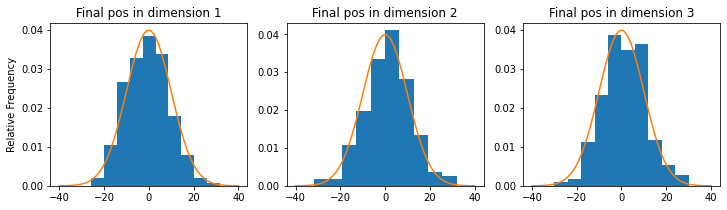

In [10]:
def next_pos(prev_pos,p=0.5):
    '''
    Takes in previous position of random walk and returns next position.
    
    Parameters
    ----------
    p: Probability of having displacement of +1 (default: 0.5)
    '''
    return prev_pos + np.random.choice([-1, 1],p=[1-p,p])

def random_walk_1D(steps=100):
    '''Returns an array of the positions of an object undergoing a 1 dimension Random Walk'''
    pos_list = [0]
    for _ in range(steps):
        pos_list.append(next_pos(pos_list[-1]))
    return np.array(pos_list)

def random_walk_ND(steps=100, n=2):
    '''Returns the positions of an object undergoing a Random Walk in N dimensions'''
    # ND walk = N*1D walk -- independence across dimensions
    # Note: n here refers to number of dimensions, not number of steps
    # Access via arr[dim,time]
    return np.array([random_walk_1D(steps) for _ in range(n)])

def ND_walk_displacement(steps=100, n=2, samples=1000):
    '''Returns the positions of an object undergoing a Random Walk in N dimensions multiple times'''
    # Take specified samples, for each of them, take the position at last step of each dimension
    # Access via arr[sample,dim]
    return np.array([random_walk_ND(steps, n)[:, -1] for _ in range(samples)])

# Data
n = 3
ND_walk_pos = ND_walk_displacement(n=n, samples=500)


# Plot ND distribution and overlay the theoretical normal curves
fig, ax = plt.subplots(ncols=n, figsize=(4*n, 3))
for i in range(n):
    
    # Plot distribution
    ax[i].hist(ND_walk_pos[:, i],density=True)
    ax[i].set_title(f'Final pos in dimension {i+1}')

    # Overlay the theoretical normal curve
    x, y = get_normal_points(0, 100, -40, 40)
    ax[i].plot(x, y)


# Customize and show
ax[0].set_ylabel('Relative Frequency')
plt.show()

Indeed, we see a good agreement between the theoretical normal distributions and the final displacements generated by our simulation!

Using the ```random_walk_ND``` function we derived above, we are able to simulate an animated 2D and 3D random walk. This visual representation shows each *discrete* step taken by the object being random in any dimension, perhaps making the later section about [Brownian motion](#Brownian-Motion) more intuitive.

#### Animation of a 2D Random Walk
To create the animation, we use the function ```FuncAnimation``` from the module ```matplotlib.animation```. After saving it as a gif, we load the gif using ```Image``` from ```Ipython.display```. The same process will be used in 3D random walk later.

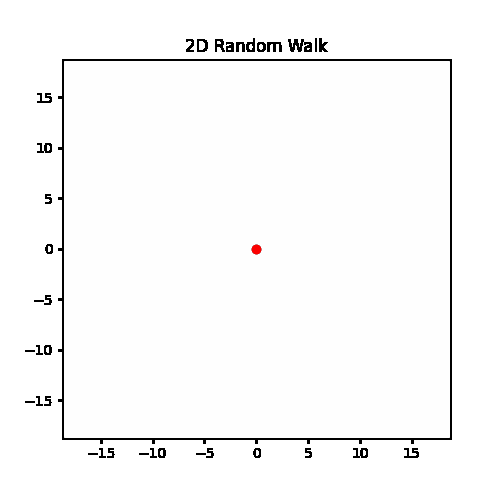

In [11]:
# Data
# Creating a 2D random walk
steps = 100
walked_2D_pos = random_walk_ND(steps, n=2)
# Split into x and y dimensions
x, y = walked_2D_pos

# Initialize plot
fig, ax = plt.subplots(figsize=(5, 5))

# Place the origin for reference
ax.scatter([0], [0], color='black', label='origin')

# The main plot will change throughout animation, so we create a container for it.
line1, = ax.plot([], [], '-r', label='path', lw=1)
point1, = ax.plot([], [], 'or', label='point')

# Customize
ax.set_title('2D Random Walk')

# Use the maximum displacement across x and y throughout the run to define our bounds for the plot
bound = np.max(np.abs(walked_2D_pos))*1.1
ax.set(xlim=(-bound, bound), ylim=(-bound, bound))

# Animate Frame for 2D
def animate_frame_2D(i):
    '''
    Defines what the i-th frame of animation should have.

    Parameters
    ----------
    i: Specifies the frame of animation

    Returns
    -------
    List of plot elements that need to be updated
    '''
    # Line from 0 to i-th (inclusive) data point, and a point for the i-th data point
    line1.set_data(x[:i+1], y[:i+1])
    point1.set_data(x[i], y[i])

    return line1, point1


# blit=True optimizes the graphing process by only redrawing the changes.
# It does so using the return values of animate.
# Therefore, animate_frame returns the list of objects need updating.
ani = FuncAnimation(fig, animate_frame_2D, blit=True, frames=steps)

# In particular, gifs outputs are not rendered for .ipynb, so saving and redirecting to output should be used instead.
ani.save("2D_walk.gif", writer=PillowWriter(fps=25), dpi=100)
# Suppress the static image
plt.close()

# Show saved gif
Image(filename="2D_walk.gif")


#### Animation of a 3D Random Walk

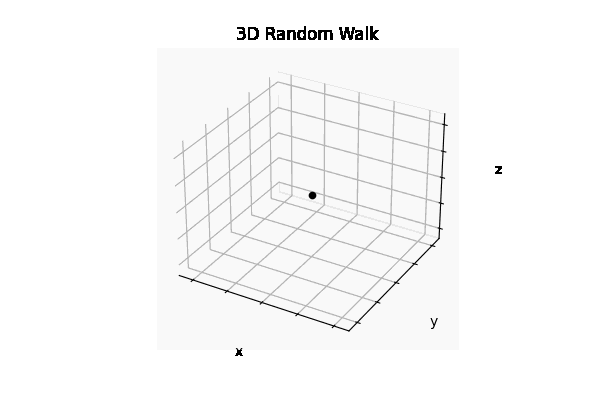

In [12]:
# Data
# Creating a 3D random walk
steps = 100
walked_3D_pos = random_walk_ND(steps, n=3)
# Split into x,y,z dimensions
x, y, z = walked_3D_pos

# Initialize plot
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Place the origin for reference
ax.scatter([0], [0], [0], color='black', label='origin')

# The main plot will change throughout animation, so create a container for it
line1, = ax.plot([], [], [], label='path', lw=1)

# Customize
ax.set_title('3D Random Walk')
# Bounds
# Use the maximum displacement across x, y and z throughout the run to define our bounds for the plot
bound = np.max(np.abs(walked_3D_pos))*1.1
ax.set(xlim3d=(-bound, bound), ylim3d=(-bound, bound), zlim3d=(-bound, bound))

ax.set(xlabel='x', ylabel='y', zlabel='z')
ax.set(xticklabels=[], yticklabels=[], zticklabels=[])

# Animate Frame for 3D
def animate_frame_3D(i):
    '''
    Defines what the i-th frame of animation should have.

    Parameters
    ----------
    i: Specifies the frame of animation

    Returns
    -------
    List of plot elements that need to be updated
    '''
    # Line from 0 to i-th (inclusive) data point, and a point for the i-th data point
    line1.set_data(x[:i+1], y[:i+1])
    line1.set_3d_properties(z[:i+1])
    return line1

# blit=True optimizes the graphing process by only redrawing the changes.
# It does so using the return values of animate.
# Therefore, animate_frame returns the list of objects need updating.
ani = FuncAnimation(fig, animate_frame_3D, frames=steps)

# In particular, gifs outputs are not rendered for .ipynb, so saving and redirecting to output should be used instead.
ani.save("3D_walk.gif", writer=PillowWriter(fps=22), dpi=100)
# Suppress the static image
plt.close()

# Show saved gif
Image(filename="3D_walk.gif")

### Brownian Motion

Following our discussion about random walks as an application of CLT, we now discuss a similar concept - Brownian motion. Brownian motion was first observed by biologist Robert Brown under the microscope, where *pollen grains moved in random motion suspended in water*. Albert Einstein later reasoned that the observed Brownian motion is due to the macroscopic particle (pollen grain) undergoing collisions with microscopic atoms, resulting in "random steps". Mathematicians tried to construct a function to describe the Brownian motion, until Norbert Wiener came up with the rigorous mathematical model of Brownian motion that is called the **Wiener process**. 

In fact, the random walk is an approximation of Brownian motion, and the approximation becomes closer when the displacement of each step becomes smaller (i.e., number of steps becomes larger). Sounds familiar?

> Brownian motion is a continuous process, while the random walk is a discrete process.

#### Wiener Process

Since real motion is continuous, we want to make our 1D random walk appear like one, with the help of appropriate scaling. Consider that in $t$ seconds, we take $n$ independent steps. In each step, there is a probability $p=0.5$ of moving in either direction. As with the coin flip, this probability is independent of past events.

Let us denote the length of each step as $d$. Equivalently, we take a step every $\delta t = t/n$ seconds, and n should be really large ($n\gg 30$). We can therefore calculate the mean and variance of each step, and find that $(\mu,\sigma^2) = (0,d^2)$. (The derivation is beyond the scope of this project.)

By CLT, **the distribution of final displacements after t seconds is normal**, with $(\mu,\sigma^2)$ = $(0, nd^2) = (0,\frac{t}{\delta t}d^2)$.

For convenience, we choose $d = \sqrt{\delta t}$. Then, for the time interval $t$, the distribution is normal with $(\mu,\sigma^2) = (0, t)$. **This describes the Wiener process, $W(t)$**.

Duration = 3 s
Expected distribution: Normal, (μ,σ^2) = (0,3)


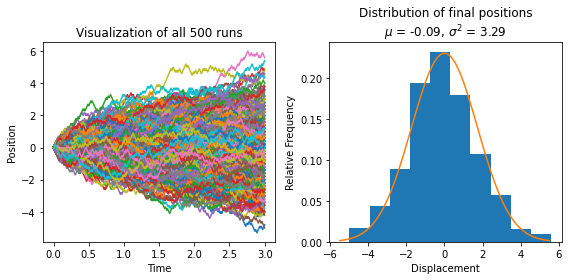

Duration = 5 s
Expected distribution: Normal, (μ,σ^2) = (0,5)


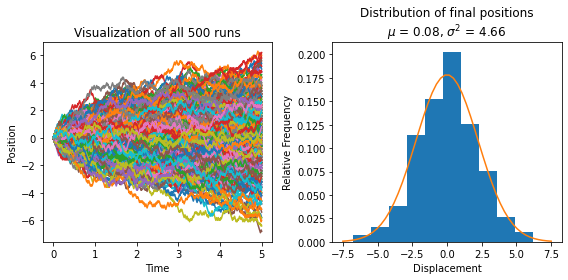

Duration = 10 s
Expected distribution: Normal, (μ,σ^2) = (0,10)


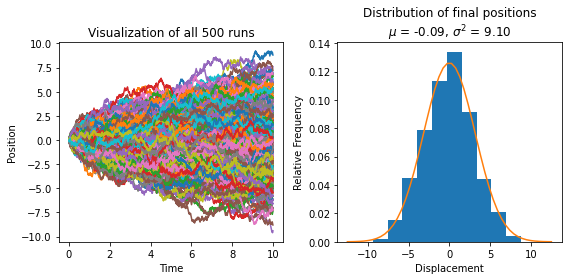

In [13]:
def wiener_process_time(steps_per_second=100,duration=5):
    '''Returns a 1D array that specifies the timing of the i-th position in the Wiener process.'''
    return np.linspace(0,duration,endpoint=True,num=steps_per_second*duration+1)

def single_wiener_process(steps_per_second=100,duration=5):
    '''
    Returns an array of the positions of an object undergoing a 1D Wiener process W(t)
    
    Parameters
    ----------
    steps_per_second: Controls the resolution of the walk, should be relatively high (default:100)
    duration: Duration of the walk.
    '''
    return random_walk_1D(steps_per_second*duration)/steps_per_second**0.5

def multi_wiener_process(steps_per_second=100,duration=5,runs=500):
    '''Returns the positions of an object undergoing a 1D Wiener process multiple times'''
    return np.array([single_wiener_process(steps_per_second,duration) for _ in range(runs)],dtype=object)

def plot_wiener_process(time, result):
    '''
    Plots individual instances of Wiener processes and the distribution of final positions.
    
    Parameters
    ----------
    time: 1D array that specifies the timing of the i-th position in each run.
    result: 2D array of the data to be plotted. Should have dimensions (runs, steps).
    '''
    # Plot ND distribution and overlay the theoretical normal curves
    fig, ax = plt.subplots(ncols =2, figsize=(8,4))
    
    # Plot runs
    for run in result:
        ax[0].plot(time,run)
    
    # Obtain final positions
    final_pos = result[:,-1] 

    # Plot distribution of final positions
    ax[1].hist(final_pos, density=True)

    # Overlay theoretical normal curve
    x, y = get_normal_points(0, time[-1], -time[-1]-2.5, time[-1]+2.5)
    ax[1].plot(x, y)

    # Customize
    ax[0].set_xlabel('Time')
    ax[1].set_xlabel('Displacement')
    ax[0].set_ylabel('Position')
    ax[1].set_ylabel('Relative Frequency')
    
    ax[0].set_title(f'Visualization of all {len(result)} runs')
    ax[1].set_title(f'Distribution of final positions\n$\mu$ = {np.mean(final_pos):.2f}, $\sigma^2$ = {np.var(final_pos):.2f}')

    plt.tight_layout()
    plt.show()

# Visualization for different durations
for d in [3,5,10]:
    print(f'Duration = {d} s')
    print(f'Expected distribution: Normal, (μ,σ^2) = (0,{d})')
    plot_wiener_process(wiener_process_time(duration=d),multi_wiener_process(duration=d))

### Cauchy Flight

Let us explore if the final displacements of another type of random walk converges to a normal distribution, like we see in the Wiener process.

A Cauchy flight is a random walk whose step lengths follow a type of heavy-tailed distribution known as the Cauchy distribution. Unlike Brownian motion, the Cauchy flight consists of both short and long trajectories. Therefore, it better models certain natural processes like turbulent motion and the foraging behavior of predators.


#### Can it Converge to a Normal Distribution?

As with the [Pareto distribution](#Limitations), the Cauchy distribution has no defined mean and variance. Therefore, you would not expect the final displacements of particles in a Cauchy flight to converge to a normal distribution.

We will now simulate the a 1D Cauchy flight using ```np.random.standard_cauchy``` to choose step displacements.

300 steps


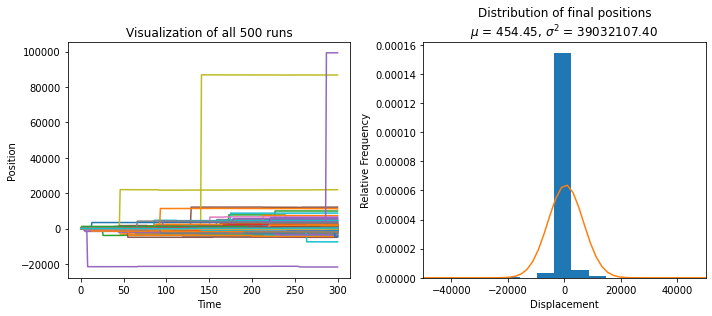

500 steps


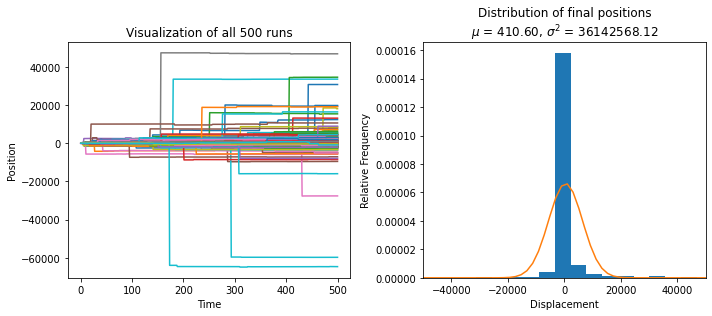

1000 steps


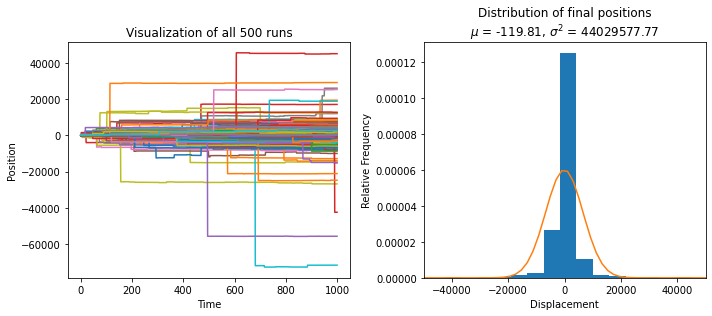

In [14]:
def cauchy_step_length(limit=1e5):
    '''
    Generates a random step length from the cauchy distribution, within the limits of 100,000.
    
    The step lengths are capped at 100,000 as extremely large step lengths (e.g., 1e6) will severely skew the data set.
    This complicates histogram plotting and overlay of the normal curve.
    It is also not meaningful to have a data set with such a skewed sense of scale.
    '''    
    while True:
        step_length = np.random.standard_cauchy()
        if abs(step_length) < limit:
            return step_length

def next_pos_cauchy(prev_pos):
    '''Takes in previous position and returns next postion'''
    return prev_pos + cauchy_step_length()

def cauchy_walk_1D(steps=100):
    '''Generates an array of the positions of a subject in Cauchy flight'''
    pos_list = [0]
    for _ in range(steps):
        pos_list.append(next_pos_cauchy(pos_list[-1]))
    return np.array(pos_list)

def plot_cauchy_process(number_of_steps, number_of_runs=500):
    '''Takes in arrays from cauchy_walk_1D and prints a graphical visualisation of the 
    displacements as well as distribution of the final positions, at steps = 300 / 500 / 1000'''
    fig, ax = plt.subplots(ncols=2, figsize=(10, 4.5))
    
    # Generate data
    time = np.linspace(0,number_of_steps,number_of_steps+1)
    result = np.array([cauchy_walk_1D(number_of_steps) for _ in range(number_of_runs)])

    # Plot runs
    for run in result:
        ax[0].plot(time, run)
    
    # Obtain final positions
    final_pos = result[:,-1] 

    # Plot distribution of final positions
    ax[1].hist(final_pos, density=True, bins=20)

    # Overlay normal curve generated from sample statistics
    x, y = get_normal_points(np.mean(final_pos), np.var(final_pos), -5e4, 5e4)
    ax[1].plot(x, y)

    # Customize
    ax[1].set_xlim(-5e4, 5e4)

    ax[0].set_xlabel('Time')
    ax[1].set_xlabel('Displacement')
    ax[0].set_ylabel('Position')
    ax[1].set_ylabel('Relative Frequency')
    
    ax[0].set_title(f'Visualization of all {number_of_runs} runs')
    ax[1].set_title(f'Distribution of final positions\n$\mu$ = {np.mean(final_pos):.2f}, $\sigma^2$ = {np.var(final_pos):.2f}')

    plt.tight_layout()
    plt.show()

for n in [300, 500, 1000]:
    print(f'{n} steps')
    plot_cauchy_process(n)

Clearly, the distribution of final displacements do not obey the normal distributions generated from the sample statistics. The minimum and maximum values are more extreme, while most of the final displacements are closely clustered around the mean.

#### Animation of a 2D Cauchy Flight

To better aid visualization of the Cauchy flight and its applicability in real-life scenarios like predator foraging, we shall run an animation of a 2D Cauchy flight. (Intuitively, when predators forage, they likely cycle between examining a small area for a while and moving to a faraway area.)

In this simulation,
- The origin of the motion is [0,0].
- Angular direction of each step is uniformly distributed. (We will use ```np.random.uniform``` for this.)
- Step length is controlled by a Cauchy distribution (with an upper limit to step size, as we did above).

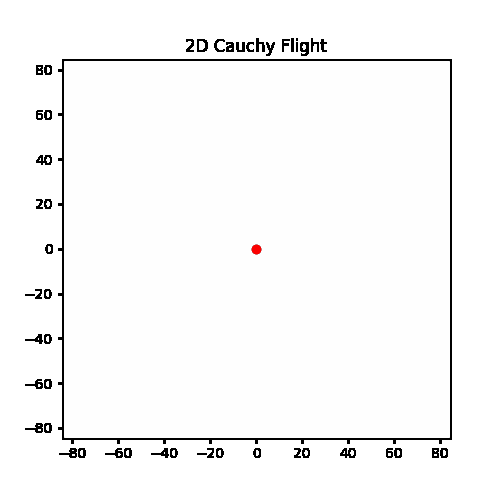

In [15]:
steps=100

def cauchy_walk_2D(number_of_steps=100):
    '''Generates an array of the positions of a subject in 2D Cauchy flight'''
    x_list = [0]
    y_list = [0]

    for _ in range(number_of_steps):
        step_length = cauchy_step_length(1e3)
        step_angle = np.random.uniform(0, 2*np.pi)

        x_list.append(x_list[-1] + step_length * np.cos(step_angle))
        y_list.append(y_list[-1] + step_length * np.sin(step_angle))

    return x_list, y_list

walked_2D_pos = cauchy_walk_2D(steps)
x, y = walked_2D_pos

# Initialize plot
fig, ax = plt.subplots(figsize=(5, 5))

# Place the origin for reference
ax.scatter([0], [0], color='black', label='origin')

# The main plot will change throughout animation, so we create a container for it.
line1, = ax.plot([], [], '-r', label='path', lw=1)
point1, = ax.plot([], [], 'or', label='point')

# Customize
ax.set_title('2D Cauchy Flight')

# Use the maximum displacement across x and y throughout the run to define our bounds for the plot
bound = np.max(np.abs(walked_2D_pos))*1.1
ax.set(xlim=(-bound, bound), ylim=(-bound, bound))

# Animate Frame for 2D
def animate_frame_2D(i):
    '''
    Defines what the i-th frame of animation should have.

    Parameters
    ----------
    i: Specifies the frame of animation

    Returns
    -------
    List of plot elements that need to be updated
    '''
    # Line from 0 to i-th (inclusive) data point, and a point for the i-th data point
    line1.set_data(x[:i+1], y[:i+1])
    point1.set_data(x[i], y[i])

    return line1, point1


# blit=True optimizes the graphing process by only redrawing the changes.
# It does so using the return values of animate.
# Therefore, animate_frame returns the list of objects need updating.
ani = FuncAnimation(fig, animate_frame_2D, blit=True, frames=steps)

# In particular, gifs outputs are not rendered for .ipynb, so saving and redirecting to output should be used instead.
ani.save("Cauchy_flight.gif", writer=PillowWriter(fps=25), dpi=100)
# Suppress the static image
plt.close()

# Show saved gif
Image(filename="Cauchy_flight.gif")


### Case Study: The Gambler's Ruin Problem

The random walk has been used to simulate a wide range of phenomena across science, like diffusion and genetic drift. In this section, we will explore one such application in statistics, known as the *Gambler's Ruin Problem*. We will also explore potential applications of the CLT (or the lack thereof) in this scenario.

***The scenario is as follows:***

Consider a gambler who starts with \\$$i$. On each successive gamble, he either wins \\$1 with a probability of $p$, or loses \\$1 with a probability of $(1−p)$, independent of past gambles.

The game ends when:
- The gambler earns his desired amount of $\$N$ ($0 < i < N$) and wins, or
- The gambler goes broke, i.e., is ruined,

whichever happens first.

Let us first define some terms:
> $R_n$: Total fortune after the $n^{th}$ gamble. $(0 < i < N)$
><br> $P_i$: Probability that the gambler wins when $R_0 = i$.
><br> $\mu_i$: Expected number of plays until the game ends, starting from $i$

We can explore this scenario by modelling the system with random walks of step length step length +1 (with probability $p$) or -1 (with a propability $(1-p)$). For each case, we will simulate a specified number of runs and plot the distributions of the outcomes.  

*Case 1: Fair Game ($p = 0.5$)*

It can be proven that:

$$P_i = \dfrac{i}{N}$$

$$\mu_i = i(N-i)$$

*Case 2: Unfavourable Odds ($p\neq 0.5$)*

It can be proven that: ($r=\dfrac{1-p}{p}$)

$$P_i = \dfrac{1-r^i}{1-r^N}$$

$$\mu_i = \dfrac{r+1}{r-1}\left(i-\dfrac{N(1-r^i)}{1-r^N}\right)$$

From these equations, we can see that if a player plays until he goes broke (i.e., as $N$ approaches infinity):
- If $p>0.5$, there is a nonzero probability that the player will become infinitely rich.
- If $p\le0.5$, the player will definitely go broke. In other words, a gambler playing a game with negative expected value will eventually be ruined.

#### Connection with CLT

Notice that the Gambler's Ruin scenario is essentially a conventional 1D random walk, but this time, we have a stopping condition (i.e., getting ruined or winning).

Needless to say, if there are no stopping conditions and the game never ends, the distribution of the amount of money after many rounds of the game will follow a normal distribution. (We can see this [here](#convergence-to-normal-distribution).) But will the parameters relevant to the Gambler's Ruin Problem also converge to a normal distribution?

> Will the relevant parameters in a 1D random walk with stopping conditions converge to a normal distribution after many steps?

In the context of the Gambler's Ruin Problem, we shall investigate:
- the distribution of number of gambles before the game ends, and
- the distribution of the amount of money left after a fixed number of gambles

for the following two scenarios:
- the player bets a desired amount ($N$), and
- the player plays until he is ruined.

##### The Player Bets A Desired Amount

It would be meaningless to investigate the distribution of the amount of money left in this scenario, since the player would either end with \\$0 or \\$$N$.

As shown in the simulation below, the number of gambles needed to end the game does not follow a normal distribution either. Instead, they follow a right-skewed distribution. This is true even if all the runs are either ruined or won.

p = 0.3


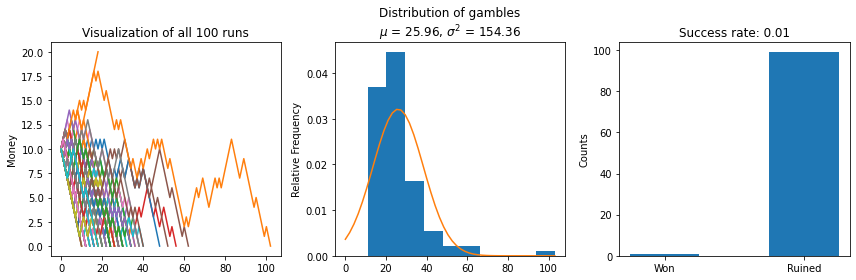

p = 0.5


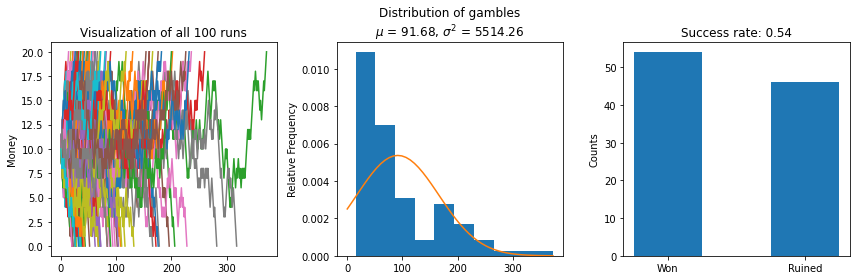

p = 0.7


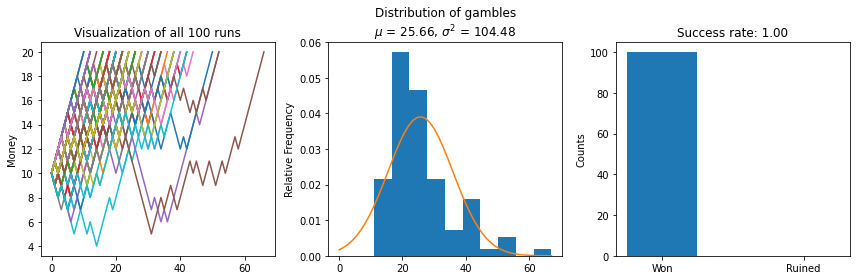

In [16]:
def single_gambler_ruin(i=10,N=20,p=0.5):
    '''
    Returns array of the changes in amount of money for a gambler, 
    until they go bankrupt or win $N (as specified)
    '''
    fortune_list = [i]
    while True:
        # Reusing random walk code!
        fortune_list.append(next_pos(fortune_list[-1],p))
        if fortune_list[-1] == 0 or fortune_list[-1] == N:
            return np.array(fortune_list)

def multi_gambler_ruin(i=10,N=20,p=0.5,runs=100):
    '''
    Returns array of the changes in amount of money for multiple gamblers, 
    until they go bankrupt or win $N (as specified)
    '''
    # Access via pot_n = arr[run,n]
    return np.array([single_gambler_ruin(i,N,p) for _ in range(runs)],dtype=object)

def plot_gambler_ruin(result):
    '''
    Takes in arrays from multi_gambler_ruin and prints a graphical visualisation of 
    the movement of money, distribution of the number of gambles required, and the final 
    outcome for the gamblers, at p = 0.3 / 0.5 / 0.7
    ''' 
    # Create plots
    fig, ax = plt.subplots(ncols =3, figsize=(12,4))
    
    # Plot runs, and also count number of losses and wins
    loss, win = 0,0
    for run in result:
        ax[0].plot(run)
        if run[-1] == 0:
            loss += 1
        else:
            win += 1
    
    # Plot time taken
    run_lengths = [len(run) for run in result]
    ax[1].hist(run_lengths, density=True)

    # Overlay with normal curve generated from sample statistics
    x, y = get_normal_points(np.mean(run_lengths), np.var(run_lengths), 0, np.max(run_lengths))
    ax[1].plot(x, y)

    # Plot wins vs loss
    ax[2].bar(("Won", "Ruined"),(win, loss), width = 0.5)
    
    # Customize
    ax[0].set_ylabel('Money')
    ax[1].set_ylabel('Relative Frequency')
    ax[2].set_ylabel('Counts')

    ax[0].set_title(f'Visualization of all {len(result)} runs')
    ax[1].set_title(f'Distribution of gambles\n$\mu$ = {np.mean(run_lengths):.2f}, $\sigma^2$ = {np.var(run_lengths):.2f}')
    ax[2].set_title(f'Success rate: {win/(loss+win):.2f}')
    
    plt.tight_layout()
    plt.show()

for p in [0.3, 0.5, 0.7]:
    print(f"p = {p}")
    plot_gambler_ruin(multi_gambler_ruin(p=p,runs=100))

##### The Player Plays Until He Is Ruined

Similarly, the number of gambles needed to end the game in this scenario does not follow a normal distribution either. Instead, it follows a right-skewed distribution if all the runs are ruined.

p=0.54


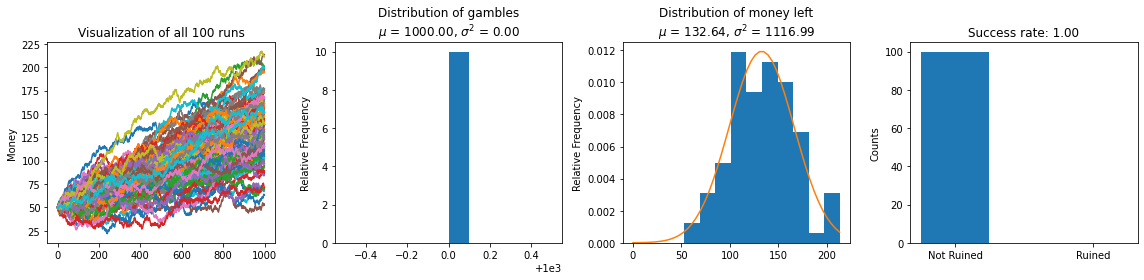

p=0.5


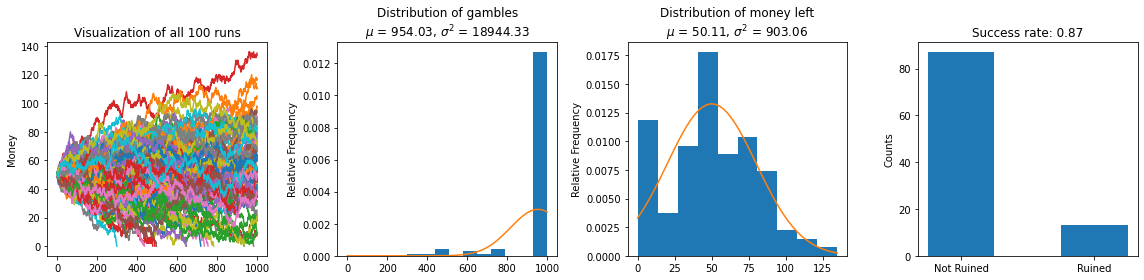

p=0.46


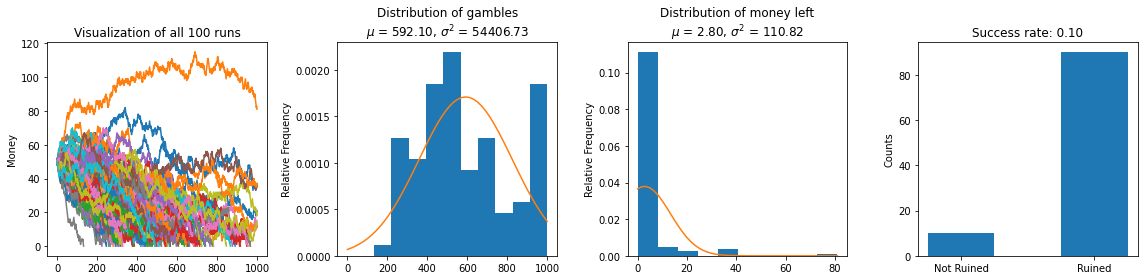

p=0.4


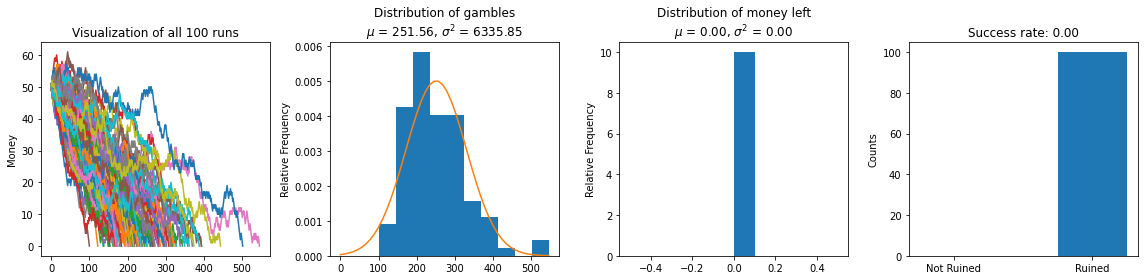

In [17]:
def single_gambler_ruin_infinite(i=10,p=0.5,max_step=1000):
    '''
    Returns array of the changes in amount of money for a gambler, until they go bankrupt or hit 
    the maximum amount of steps allowed (only to save your computer from actual infinite suffering)
    '''
    # Highly similar to finite version, except modified exit condition
    fortune_list = [i]
    while len(fortune_list) < max_step:
        # Reusing random walk code!
        fortune_list.append(next_pos(fortune_list[-1],p))
        if fortune_list[-1] == 0:
            break
    return np.array(fortune_list)

def gamblers_ruin_infinite(i=50, p=0.7, runs=100, max_step=1000):
    '''
    Returns array of the changes in amount of money for multiple gamblers, 
    until they go bankrupt or hit the maximum amount of steps allowed
    '''
    return np.array([single_gambler_ruin_infinite(i,p,max_step) for _ in range(runs)],dtype=object)

def plot_gambler_ruin_infinite(result):
    '''
    Takes in arrays from gamblers_ruin_infinite and prints a graphical visualisation of 
    the movement of money, distribution of the number of gambles required, and the final 
    outcome for the gamblers, at p = 0.3 / 0.5 / 0.7
    '''
    # Highly similar to finite version, except for different bar graph labels and a fourth plot for the amount of money left at the end of the game
    
    # Create plots
    fig, ax = plt.subplots(ncols =4, figsize=(16,4))
    
    # Plot runs, and also count number of losses and wins
    loss, win = 0,0
    for run in result:
        ax[0].plot(run)
        if run[-1] == 0:
            loss += 1
        else:
            win += 1
    
    # Plot time taken
    run_lengths = [len(run) for run in result]
    ax[1].hist(run_lengths, density=True)

    # Overlay with normal curve generated from sample statistics
    if np.var(run_lengths) != 0: # To avoid runtime error (division by zero), if none of the runs were ruined
        x, y = get_normal_points(np.mean(run_lengths), np.var(run_lengths), 0, np.max(run_lengths))
        ax[1].plot(x, y)

    # Plot amount of money left at the end of the game
    final_amounts = [run[-1] for run in result]
    ax[2].hist(final_amounts, density=True)

    # Overlay with normal curve generated from sample statistics
    if np.var(final_amounts) !=0: # To avoid runtime error (division by zero), if all of the runs were ruined
        x, y = get_normal_points(np.mean(final_amounts), np.var(final_amounts), 0, np.max(final_amounts))
        ax[2].plot(x, y)

    # Plot wins vs loss
    ax[3].bar(("Not Ruined", "Ruined"),(win, loss), width = 0.5)
    
    # Customize
    ax[0].set_ylabel('Money')
    ax[1].set_ylabel('Relative Frequency')
    ax[2].set_ylabel('Relative Frequency')
    ax[3].set_ylabel('Counts')

    ax[0].set_title(f'Visualization of all {len(result)} runs')
    ax[1].set_title(f'Distribution of gambles\n$\mu$ = {np.mean(run_lengths):.2f}, $\sigma^2$ = {np.var(run_lengths):.2f}')
    ax[2].set_title(f'Distribution of money left\n$\mu$ = {np.mean(final_amounts):.2f}, $\sigma^2$ = {np.var(final_amounts):.2f}')
    ax[3].set_title(f'Success rate: {win/(loss+win):.2f}')
    
    plt.tight_layout()
    plt.show()

for p in [0.54,0.5,0.46,0.4]:
    print(f'p={p}')
    plot_gambler_ruin_infinite(gamblers_ruin_infinite(p=p))


Among the above histograms, the only one which agrees with a normal distribution is the distribution of money left when none of the runs are ruined $(p=0.54)$. In this case, there is essentially no stopping condition, and the convergence of a random walk to a normal distribution holds. (Yes, the CLT applies to biased random walks too! Remember, all that is needed is for the distribution of outcomes to have a [finite mean and variance](#Additional-Conditions).)

In summary, we have seen how introducing stopping conditions (as in the Gambler's Ruin Problem) drastically changes the types of distributions we see in the final positions of a random walk. These distributions do not converge to a normal distribution after many rounds.

## Closing Remarks

In this notebook, we have:
- Introduced the Central Limit Theorem with simulations of coin flips and dice rolls.
- Demonstrated the utility of the Central Limit Theorem in sampling.
- Discussed the scenarios when the Central Limit Theorem does not apply.
- Demonstrated the convergence of an nD random walk to a normal distribution, and explained its relevance in Brownian motion.
- Shown that not all random walks converge to a normal distribution (e.g., Cauchy flight).
- Discussed N dimensional random walks and the Cauchy flight with the help of animations.
- Explored the case study of the Gambler's Ruin Problem, in particular, the effect of stopping conditions on the distribution of outcomes and their ability to converge to a normal distribution.

We hope you have learnt something interesting from our Jupyter notebook!

## Appendix: Hypothesis Testing

It would not be appropriate to conclude a discussion about the CLT without mentioning one of its most important applications - in hypothesis testing.

Given any finite discrete population with mean $\mu$ and variance $\sigma^2$, we have seen that CLT asserts that the distribution of the sample mean, with sample size $n$, approximates a normal distribution with mean $\mu$ and variance $\sigma^2/n$.

Going back to the [coin flip example](#direct-application), suppose we have a sample of size 100 and observe 10 heads and 90 tails. Does this observation give you confidence that the coin is indeed fair? How might we use statistics to construct an argument and prove beyond a reasonable doubt that the coin is indeed biased?

This is done by hypothesis testing, and the appropriate test in this context is the one-sample z test.
* One sample as we want to make a conclusion from one sample.
* z-test as we *know* the mean and variance of a fair coin, and this hypothesis is what we want to test against.

1. Define the null and alternative hypotheses.
> $H_0$: The coin has a $p=0.5$ chance of landing on heads (and tails).
> <br>$H_A$: The coin has a probability $p\neq 0.5$ of landing on heads.

2. Find the probability of observing an outcome at least as extreme as the sample, assuming the null hypothesis is true.
> This includes outcomes that have $\leq 10$ heads, and crucially also outcomes with $\geq 90$ heads. This is called a two-tailed test.
> <br><br> Here lies the true power of CLT. Since sample size $= 100 \geq 30$, we know that we can use a normal distribution with mean 0.5 and variance 0.25/100 to approximate the distribution of sample means.
> <br><br> Therefore, the probability is given by $ P(\bar{X} \leq 0.1) + P(\bar{X} \geq 0.9) = 2 P(\bar{X} \leq 0.1)$. We can find this value via direct computation, but typically do so via a normalization into a *test statistic*, $z$, then look up a table of known $P(Z<z)$ values.

Computing the test statistic: $ z = \dfrac{0.1 - 0.5}{\sqrt{\dfrac{0.25}{100}}} = -8 $, which corresponds to a probability of $\ll 0.00001$.

3. Make an appropriate conclusion. Since the probability of observing an outcome at least as extreme as the sample is 0.00001, we infer that this outcome is so exceedingly rare, in particular less than 5% (a typical significance level), that we reject the null hypothesis.

This has provided us with a quantitative method to justify with a high level of confidence that, indeed the coin is unlikely to be fair.

## References / Further Reading

1.     (n.d.). Gambler's Ruin Problem. Retrieved April 1, 2022, from http://www.columbia.edu/~ks20/FE-Notes/4700-07-Notes-GR.pdf
2.    Bento, C. (2020, October 15). Central Limit Theorem: a real-life application | by Carolina Bento. Towards Data Science. Retrieved April 1, 2022, from https://towardsdatascience.com/central-limit-theorem-a-real-life-application-f638657686e1
3.    BROWNIAN MOTION. (n.d.). Retrieved April 1, 2022, from https://galton.uchicago.edu/~lalley/Courses/313/BrownianMotionCurrent.pdf
4.    Chapter 16 - Convergence of Random Walks. (n.d.). CMU Statistics. Retrieved April 1, 2022, from https://www.stat.cmu.edu/~cshalizi/754/notes/lecture-16.pdf
5.    Holmes-Cerfon, M. (2019). Applied Stochastic Analysis, Lecture 6: Brownian motion. Courant Institute of Mathematical Sciences. Retrieved April 1, 2022, from https://cims.nyu.edu/~holmes/teaching/asa19/handout_Lecture6_2019.pdf
6.    Jaillet, P. (2018, April 24). L26.9 Gambler's Ruin. YouTube. Retrieved April 1, 2022, from https://www.youtube.com/watch?v=Ne2lmAZI4-I
7.    Leighton, T., & Rubinfeld, R. (2006, December 12). Random Walks. Mathematics for Computer Science. Retrieved April 1, 2022, from https://web.mit.edu/neboat/Public/6.042/randomwalks.pdf
8.    Lévy flight. (2022, March 15). Wikipedia. Retrieved April 1, 2022, from https://en.wikipedia.org/wiki/L%C3%A9vy_flight
9.    Massachusetts Institute of Technology. (n.d.). Introduction To Probability And Statistics. MIT OpenCourseWare. https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2014/pages/readings/
10.    Pishro-Nik, H. (n.d.). 11.4.1 Brownian Motion as the Limit of a Symmetric Random Walk. Introduction to Probability. Retrieved April 1, 2022, from https://www.probabilitycourse.com/chapter11/11_4_1_brownian_motion_as_the_limit_of_a_symmetric_random_walk.php
11.    Quillen, A. C. (2021, March 24). PHY256 Notes on the Central limit theorem, Random Walks and Diffusion. Retrieved April 1, 2022, from http://astro.pas.rochester.edu/~aquillen/phy256/lectures/Diffusion_walks.pdf
12.    Yan, L., Piech, C., Saham, M., & Cain, J. (2020, October 23). 18: Central Limit Theorem. Stanford Edu. Retrieved April 1, 2022, from https://web.stanford.edu/class/archive/cs/cs109/cs109.1214/lectures/18-CentralLimitTheorem/18-CentralLimitTheorem.pdf
